In [1]:
import numpy as np
import pandas as pd

In [2]:
D = "$d_{\lambda}$"
DOLD = "$d_{\lambda-1}$"
DATA = "$E_{data}^{\lambda}$"
IN = "$m$"
M2 = "$m_{\lambda-1}^2$"
DDM2 = "$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2$" 
R = "$r$"
R2 = "$r^2$"
SIGMA = "$\sigma$"
SIGMA2 = "$\sigma^{-2}$"
TARGET_TERM = "$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$"

df = pd.read_csv("random_networks_simba.csv", header=None, sep=";")
df.columns = [IN, D, DOLD, R, SIGMA, "ENERGY", "COMP", DATA]

df[R2] = df[R]*df[R]
df[SIGMA2] = 1/(df[SIGMA]*df[SIGMA])
df[M2] = df[IN]*df[IN]

df[TARGET_TERM] = df[D]*df[DOLD]*df[M2]*df[R2]*df[SIGMA2]

df

,$m$,$d_{\lambda}$,$d_{\lambda-1}$,$r$,$\sigma$,ENERGY,COMP,$E_{data}^{\lambda}$,$r^2$,$\sigma^{-2}$,$m_{\lambda-1}^2$,$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$
0,102,16,18,5,5,3.590054e+07,1.780652e+06,3.411989e+07,25,0.04,10404,2.996352e+06
1,86,18,63,3,5,6.188842e+07,1.854422e+06,6.003400e+07,9,0.04,7396,3.019343e+06
2,65,17,85,5,5,1.290708e+08,3.423754e+06,1.256470e+08,25,0.04,4225,6.105125e+06
3,367,23,8,3,5,2.044876e+08,5.085478e+06,1.994021e+08,9,0.04,134689,8.921799e+06
4,86,16,316,3,5,3.001282e+08,8.268040e+06,2.918601e+08,9,0.04,7396,1.346190e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
4835,391,436,421,13,1,6.209320e+13,2.498859e+12,5.959434e+13,169,1.00,152881,4.742516e+12
4836,343,446,411,15,1,4.277937e+13,2.503566e+12,4.027580e+13,225,1.00,117649,4.852298e+12
4837,448,427,475,11,1,8.241803e+13,2.640360e+12,7.977767e+13,121,1.00,200704,4.925642e+12
4838,417,401,323,15,1,7.733024e+13,2.654285e+12,7.467596e+13,225,1.00,173889,5.067591e+12


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

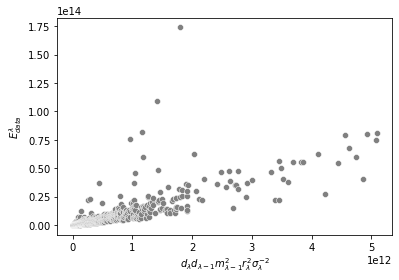

In [4]:
ax = sns.scatterplot(data=df, x=TARGET_TERM, y=DATA, color="gray")

In [5]:
df = df[df[TARGET_TERM] < 0.4e12]
label="random_values"

In [6]:
C = 10
values = sorted(list(df[TARGET_TERM].unique()))

In [7]:
values

[2996352.0,
 3019343.04,
 6105125.0,
 8921799.36,
 13461903.36,
 13721600.0,
 13727025.0,
 15807052.8,
 20283648.0,
 21167308.8,
 21893237.28,
 24133443.84,
 24634368.0,
 26265600.0,
 27154521.0,
 27444204.0,
 27550193.04,
 29267358.75,
 29324592.0,
 29581770.240000002,
 29690496.0,
 30800250.0,
 31479732.0,
 32768064.0,
 33154500.0,
 38296293.75,
 40057027.2,
 41194764.0,
 41472000.0,
 45544275.0,
 46215385.125,
 47384568.0,
 52398596.25,
 53214021.0,
 53539200.0,
 54589626.0,
 57263625.0,
 60637032.0,
 64523926.08,
 67994344.32000001,
 68430528.0,
 68866176.0,
 71550000.0,
 72234373.12,
 72740304.0,
 73361751.84,
 73626187.5,
 75540241.92,
 77299408.0,
 82412664.84,
 83408290.0,
 87986250.0,
 89474332.0,
 90814500.0,
 91917728.0,
 94006008.0,
 94889088.0,
 97789368.60000001,
 98668938.24,
 99566688.0,
 103193303.4,
 104191069.5,
 105504768.0,
 107440135.1111111,
 107505921.60000001,
 110160055.6875,
 115839360.0,
 115870540.5,
 118053936.0,
 120231225.0,
 121409474.4,
 122253300.0,
 

In [8]:
values.append(1e20)

In [9]:
values[-1] 

1e+20

In [10]:
result = []
min_x = range(0,len(values),C)
for min, max in zip(min_x, min_x[1:]):
    print(min, max)
    res = {"box": min}
    sel = df[(df[TARGET_TERM]>= values[min]) & (df[TARGET_TERM] < values[max])][[TARGET_TERM, DATA]]
    min_value = sel[DATA].min()
    min_product = sel[sel[DATA] == min_value][TARGET_TERM]
    res["min_value"] =  min_value
    res[TARGET_TERM] =  min_product.values[0]
    result.append(res)

0 10
10 20
20 30
30 40
40 50
50 60
60 70
70 80
80 90
90 100
100 110
110 120
120 130
130 140
140 150
150 160
160 170
170 180
180 190
190 200
200 210
210 220
220 230
230 240
240 250
250 260
260 270
270 280
280 290
290 300
300 310
310 320
320 330
330 340
340 350
350 360
360 370
370 380
380 390
390 400
400 410
410 420
420 430
430 440
440 450
450 460
460 470
470 480
480 490
490 500
500 510
510 520
520 530
530 540
540 550
550 560
560 570
570 580
580 590
590 600
600 610
610 620
620 630
630 640
640 650
650 660
660 670
670 680
680 690
690 700
700 710
710 720
720 730
730 740
740 750
750 760
760 770
770 780
780 790
790 800
800 810
810 820
820 830
830 840
840 850
850 860
860 870
870 880
880 890
890 900
900 910
910 920
920 930
930 940
940 950
950 960
960 970
970 980
980 990
990 1000
1000 1010
1010 1020
1020 1030
1030 1040
1040 1050
1050 1060
1060 1070
1070 1080
1080 1090
1090 1100
1100 1110
1110 1120
1120 1130
1130 1140
1140 1150
1150 1160
1160 1170
1170 1180
1180 1190
1190 1200
1200 1210
1210 1220

In [11]:
result

[{'box': 0,
  'min_value': 34119892.11,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 2996352.0},
 {'box': 10,
  'min_value': 124440331.91,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 24634368.0},
 {'box': 20,
  'min_value': 279254098.02,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 41472000.0},
 {'box': 30,
  'min_value': 287619611.58,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 47384568.0},
 {'box': 40,
  'min_value': 400214463.92,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 71550000.0},
 {'box': 50,
  'min_value': 570182657.96,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 91917728.0},
 {'box': 60,
  'min_value': 843497777.53,
  '$d_{\\lambda}d_{\\lambda-1}m_{\\lambda-1}^2r_{\\lambda}^2\\sigma_{\\lambda}^{-2}$': 103193303.4},
 {'box':

In [12]:
minimas = pd.DataFrame(result)
minimas

,box,min_value,$d_{\lambda}d_{\lambda-1}m_{\lambda-1}^2r_{\lambda}^2\sigma_{\lambda}^{-2}$
0,0,3.411989e+07,2.996352e+06
1,10,1.244403e+08,2.463437e+07
2,20,2.792541e+08,4.147200e+07
3,30,2.876196e+08,4.738457e+07
4,40,4.002145e+08,7.155000e+07
...,...,...,...
444,4440,2.085378e+12,3.389563e+11
445,4450,2.057604e+12,3.560191e+11
446,4460,1.874984e+12,3.630717e+11
447,4470,2.023370e+12,3.756668e+11


# Lower bound

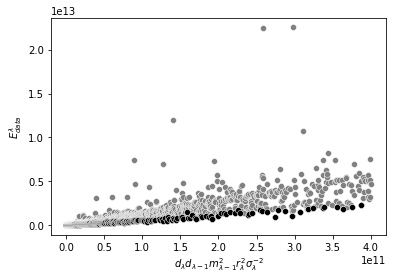

In [13]:
sns.scatterplot(data=df, x=TARGET_TERM, y=DATA, color="gray");
ax = sns.scatterplot(data=minimas, x=TARGET_TERM, y="min_value", color="black");
#ax.set(title=f"C = {C}")
ax.set(ylabel="$E_{data}^{\lambda}$")
plt.savefig(f"final_exp_min_values_{C}{'_'+label if label else label}.png", bbox_inches="tight");

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(minimas[[TARGET_TERM]], minimas["min_value"])

LinearRegression()

In [17]:
model.score(minimas[[TARGET_TERM]], minimas["min_value"])

0.9628341059526005

In [18]:
X = np.linspace(0, 0.5e12, 10000).reshape(-1,1)


In [19]:
y = model.predict(X)

/home/petra/miniconda3/envs/sima/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
regress = pd.DataFrame(zip(X.flatten(), y))
regress

,0,1
0,0.000000e+00,-6.221213e+09
1,5.000500e+07,-5.942108e+09
2,1.000100e+08,-5.663003e+09
3,1.500150e+08,-5.383898e+09
4,2.000200e+08,-5.104793e+09
...,...,...
9995,4.998000e+11,2.783432e+12
9996,4.998500e+11,2.783711e+12
9997,4.999000e+11,2.783990e+12
9998,4.999500e+11,2.784269e+12


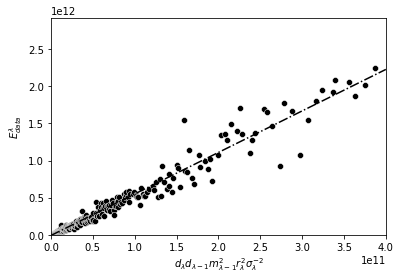

In [21]:

ax = sns.scatterplot(data=minimas, x=TARGET_TERM, y="min_value", color="black");
ax = sns.lineplot(data=regress, x=0, y=1, color="black", ls="-.", ax=ax)
ax.set(ylabel="$E_{data}^{\lambda}$")
ax.set(xlim=(0,4e11))
ax.set(ylim=(0, None))
plt.savefig(f"final_exp_lin_regress_{C}{'_'+label if label else label}.png", bbox_inches="tight");

In [22]:
import statsmodels.api as sm

#minimas[DDM2] /= 1e10

minimas["X"] = (minimas[TARGET_TERM]-2e11)/2e11
minimas["SQ"] = minimas["X"]*minimas["X"]

Y=minimas["min_value"]/2e11
X=minimas[["X", "SQ"]]
X = sm.add_constant(X)

X, Y

(     const         X        SQ
 0      1.0 -0.999985  0.999970
 1      1.0 -0.999877  0.999754
 2      1.0 -0.999793  0.999585
 3      1.0 -0.999763  0.999526
 4      1.0 -0.999642  0.999285
 ..     ...       ...       ...
 444    1.0  0.694781  0.482721
 445    1.0  0.780095  0.608549
 446    1.0  0.815359  0.664810
 447    1.0  0.878334  0.771471
 448    1.0  0.935530  0.875217
 
 [449 rows x 3 columns],
 0       0.000171
 1       0.000622
 2       0.001396
 3       0.001438
 4       0.002001
          ...    
 444    10.426888
 445    10.288021
 446     9.374918
 447    10.116852
 448    11.245178
 Name: min_value, Length: 449, dtype: float64)

In [23]:
model = sm.OLS(Y,X)
results = model.fit()
results.pvalues

const     0.000000e+00
X        1.369488e-235
SQ        3.083913e-01
dtype: float64

In [24]:
import statsmodels.formula.api as smf

In [25]:
minimas["L"] = minimas["X"]
model = smf.ols(formula=f'min_value ~ L + SQ',data=minimas)

In [26]:
results = model.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              min_value   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     5791.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          8.25e-320
Time:                        09:43:03   Log-Likelihood:                -11906.
No. Observations:                 449   AIC:                         2.382e+04
Df Residuals:                     446   BIC:                         2.383e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.106e+12   9.77e+09    113.196      0.000    1.09e+12    1.12e+12
L            1.13e+12   1.68e+10     67.251      0.000     1.1e+12    1.16e+12
SQ          2.032e+10   1.99e+10      1.020      0.308   -1.88e+10    5.95e+10
==============================================================================
Omnibus:                      143.585   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14029.060
Skew:                          -0.007   Prob(JB):                         0.00
Kurtosis:                      30.384   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(results.pvalues)

Intercept     0.000000e+00
L            1.369488e-235
SQ            3.083913e-01
dtype: float64
